In [1]:
# HW: https://www.w3resource.com/python-exercises/pandas/index.php

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [2]:
%cd "/content/gdrive/MyDrive/BME/Lab-513/Training/Pandas"

/content/gdrive/MyDrive/BME/Lab-513/Training/Pandas


In [3]:
!ls

 download_data.py		   pandas-fundamental-1
'Example-pandas(Panel-1).gsheet'   pandas-fundamental-2


In [4]:
!python download_data.py

Start to download, this process take a few minutes
Downloaded dataset - https://github.com/DatacollectorVN/Frameworks-Machine-Learning/releases/download/1/sinh_vien_VL.csv to-'./dataset/sinh_vien_VL.csv'


In [5]:
!ls

 dataset	   'Example-pandas(Panel-1).gsheet'   pandas-fundamental-2
 download_data.py   pandas-fundamental-1


In [16]:
!ls dataset/

sinh_vien_VL.csv  titanic.csv


In [7]:
import pandas as pd
import numpy as np 
import warnings
warnings.filterwarnings('ignore')

+ load file (.csv)

In [19]:
df = pd.read_csv('dataset/titanic.csv', header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NaN,S
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,NaN,S
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S


In [99]:
df = pd.read_csv('dataset/titanic.csv', index_col = 0)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


+  Overall dataframe

In [100]:
df.shape

(891, 11)

In [101]:
print(f'Number of sample (rows) = {df.shape[0]}')
print(f'Number of feature (cols) = {df.shape[1]}')

Number of samples (rows) = 891
Number of feature (cols) = 11


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


+ 3 cols have NaN or Null value

In [103]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


+ 3 colums with null-value: Age; Cabin; Embarked

### clean data

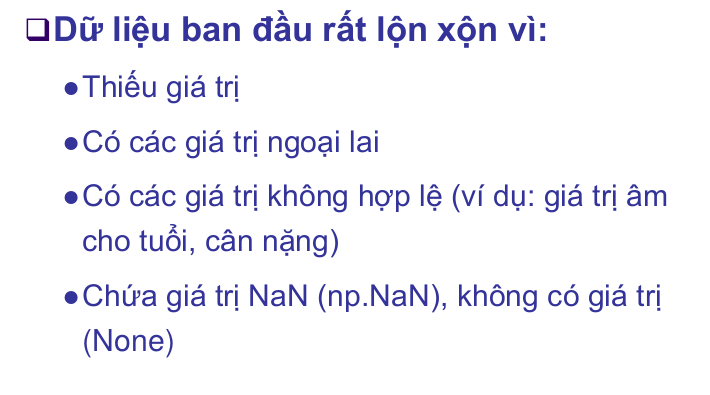

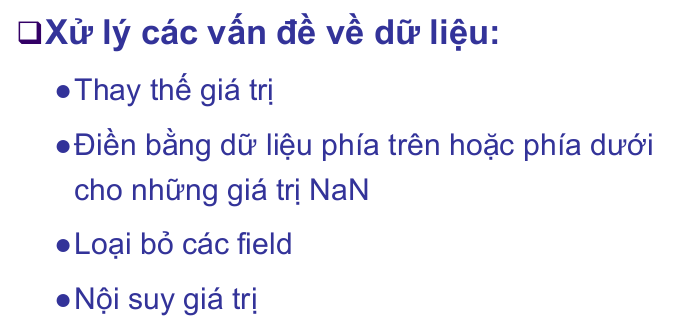

Count the NaN under a single DataFrame column

In [104]:
columns_with_null = ['Age', 'Cabin', 'Embarked']
for col in columns_with_null:
  count = df[col].isnull().sum()
  print(f'Number of NaN of {col} = {count}')

Number of NaN of Age = 177
Number of NaN of Cabin = 687
Number of NaN of Embarked = 2


In [105]:
print(f'Number of samples (rows) = {df.shape[0]}')

Number of samples (rows) = 891


+ remove the sample with NaN in Embarked columns

In [106]:
df[df['Embarked'].isnull()].index

Int64Index([62, 830], dtype='int64', name='PassengerId')

In [107]:
df = df.drop(df[df['Embarked'].isnull()].index)

+ remove the Cabin column

In [108]:
df = df.drop(['Cabin'], axis = 1)

+ in the Age column

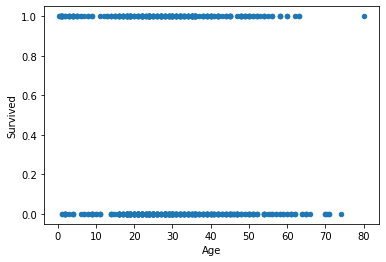

In [109]:
df[['Age', 'Survived']].plot.scatter(x = 'Age', y = 'Survived')

In [110]:
df[['Age', 'Survived']].corr(method='pearson')

,Age,Survived
Age,1.000000,-0.082446
Survived,-0.082446,1.000000


+ Age and survived are independence

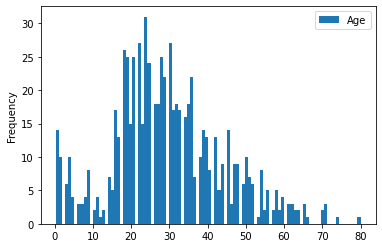

In [111]:
df[['Age']].plot.hist(bins = 100)

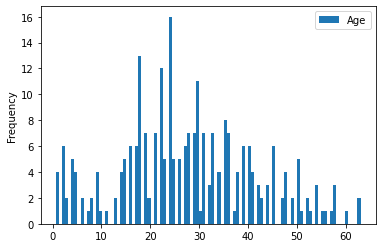

In [112]:
df[df['Sex'] == "female"][['Age']].plot.hist(bins = 100)

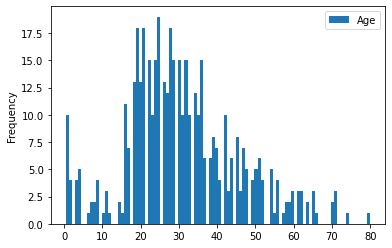

In [113]:
df[df['Sex'] == "male"][['Age']].plot.hist(bins = 100)

conclusion: 
+ Age = median(female) (if that person is female)
+ Age = median(male) (if that person is male)

In [114]:
median_female = df[df['Sex'] == "female"][['Age']].median().values[0]
median_male = df[df['Sex'] == "male"][['Age']].median().values[0]

print(f'median_female = {median_female}')
print(f'median_male = {median_male}')

median_female = 27.0
median_male = 29.0


In [115]:
index = df[df['Age'].isnull()].index
for i in df.loc[index][df['Sex'] == "female"]['Age'].index :
  df['Age'][i] = median_female

for i in df.loc[index][df['Sex'] == "male"]['Age'].index :
  df['Age'][i] = median_male

print('Done')

Done


+ Check again

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 116.4+ KB


+ Check outlier = Boxplot (IQR)

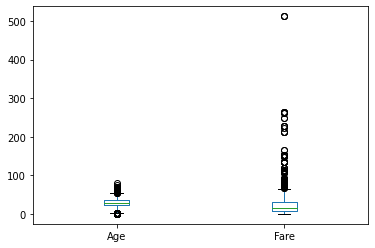

In [118]:
df[['Age', 'Fare']].plot.box()

+ too many outlier in Age and Fare column --> need to solve these but in this repository, we just ignore.

### Convert dataset 

In [120]:
# calculate the mean of age of the survived and non-survived people
df.groupby(by = "Survived").mean()['Age']

Survived
0    30.193989
1    28.104912
Name: Age, dtype: float64

In [121]:
# calculate the total of survived accroding to Pclass
df.groupby(by = "Pclass").sum()['Survived']

Pclass
1    134
2     87
3    119
Name: Survived, dtype: int64

In [131]:
total_people_pclass_1  =df[df['Pclass'] == 1]['Survived'].value_counts().sum()
total_people_pclass_2  =df[df['Pclass'] == 2]['Survived'].value_counts().sum()
total_people_pclass_3  =df[df['Pclass'] == 3]['Survived'].value_counts().sum()

print(f'total_people_pclass_1 = {total_people_pclass_1}')
print(f'total_people_pclass_2 = {total_people_pclass_2}')
print(f'total_people_pclass_3 = {total_people_pclass_3}')

total_people_pclass_1 = 214
total_people_pclass_2 = 184
total_people_pclass_3 = 491


In [132]:
# how many % survived according to Pclass
per_class_1 = round(df.groupby(by = "Pclass").sum()['Survived'][1] / total_people_pclass_1, 2) * 100
per_class_2 = round(df.groupby(by = "Pclass").sum()['Survived'][2] / total_people_pclass_2, 2) * 100
per_class_3 = round(df.groupby(by = "Pclass").sum()['Survived'][3] / total_people_pclass_3, 2) * 100

print(f'per_class_1 = {per_class_1}%')
print(f'per_class_2 = {per_class_2}%')
print(f'per_class_3 = {per_class_3}%')

per_class_1 = 63.0%
per_class_2 = 47.0%
per_class_3 = 24.0%


In [134]:
df.groupby(by = "Pclass").mean()['Fare']

Pclass
1    84.193516
2    20.662183
3    13.675550
Name: Fare, dtype: float64

Conclusion: 
+ Đừng hỏi tiền nhiều để làm gì nữa nghen :> 
+ Nếu đi du lịch biển, nhớ chi tiền nằm hạng thương gia --> tỉ lệ sống sót cao hơn 

### Concatenate dataset

pd.concat([df1, df2, ..])

df.append([df1, df2, ...])

pd.merge(df1, df2, how = )

In [135]:
df_left = pd.DataFrame({"Key_1" : ["K0", "K1", "K2", "K3"], 
                        "Key_2" : ['Z0', "Z1", "Z2", "Z3"], 
                        "City" : ["city1", "city2", "city3", "city4"]})

df_right = pd.DataFrame({"Key_1" : ["K0", "K1", "K2", "K3"], 
                         "Key_2" : ['Z0', "Z1", "Z2", "Z3"], 
                         "User_Name" : ["urser1", "user2", "user3", "user4"]})

In [136]:
df_left

,Key_1,Key_2,City
0,K0,Z0,city1
1,K1,Z1,city2
2,K2,Z2,city3
3,K3,Z3,city4


In [137]:
df_right

,Key_1,Key_2,User_Name
0,K0,Z0,urser1
1,K1,Z1,user2
2,K2,Z2,user3
3,K3,Z3,user4


+ pd.concat()

In [142]:
df_concat = pd.concat([df_left, df_right], axis = 0)
df_concat

,Key_1,Key_2,City,User_Name
0,K0,Z0,city1,NaN
1,K1,Z1,city2,NaN
2,K2,Z2,city3,NaN
3,K3,Z3,city4,NaN
0,K0,Z0,NaN,urser1
1,K1,Z1,NaN,user2
2,K2,Z2,NaN,user3
3,K3,Z3,NaN,user4


In [144]:
df_concat = pd.concat([df_left, df_right], axis = 1)
df_concat

,Key_1,Key_2,City,Key_1,Key_2,User_Name
0,K0,Z0,city1,K0,Z0,urser1
1,K1,Z1,city2,K1,Z1,user2
2,K2,Z2,city3,K2,Z2,user3
3,K3,Z3,city4,K3,Z3,user4


In [145]:
df_concat = pd.concat([df_left, df_right], axis = 0, join = "inner")
df_concat

,Key_1,Key_2
0,K0,Z0
1,K1,Z1
2,K2,Z2
3,K3,Z3
0,K0,Z0
1,K1,Z1
2,K2,Z2
3,K3,Z3


In [150]:
df_append = df_left.append(df_right)
df_append

,Key_1,Key_2,City,User_Name
0,K0,Z0,city1,NaN
1,K1,Z1,city2,NaN
2,K2,Z2,city3,NaN
3,K3,Z3,city4,NaN
0,K0,Z0,NaN,urser1
1,K1,Z1,NaN,user2
2,K2,Z2,NaN,user3
3,K3,Z3,NaN,user4


+ df.append()

In [149]:
df_append = df_left.append(df_right, ignore_index = True)
df_append

,Key_1,Key_2,City,User_Name
0,K0,Z0,city1,NaN
1,K1,Z1,city2,NaN
2,K2,Z2,city3,NaN
3,K3,Z3,city4,NaN
4,K0,Z0,NaN,urser1
5,K1,Z1,NaN,user2
6,K2,Z2,NaN,user3
7,K3,Z3,NaN,user4


+ pd.merge()

In [153]:
df_concat = pd.merge(df_left, df_right, how = "inner")
df_concat

,Key_1,Key_2,City,User_Name
0,K0,Z0,city1,urser1
1,K1,Z1,city2,user2
2,K2,Z2,city3,user3
3,K3,Z3,city4,user4


+ string manipulation --> Regurlar Expression
+ Timestampls --> datetime

we don't mention in this repository

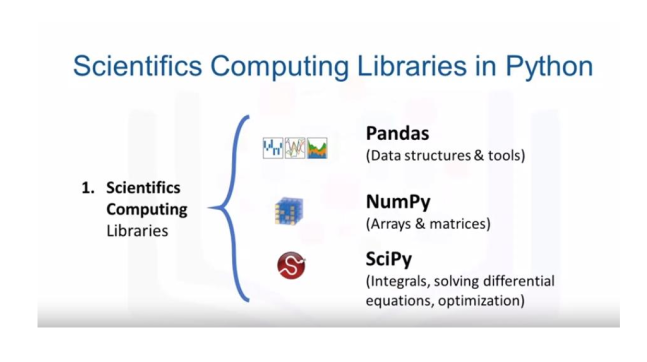